# Channappa Time series mini project 04

## import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
#from sklearn.seasonal  import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [177]:
df=pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls')

In [3]:
df.shape

(9994, 21)

In [4]:
df1=df[df.Category=='Furniture']
df1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


### check for data types

In [5]:
df1.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

## check for null values

In [6]:
df1.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## no null values

## EDA (Exploratary Data Analysis )

<AxesSubplot:xlabel='Sales'>

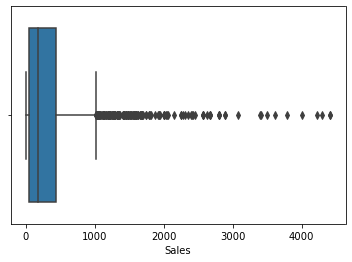

In [7]:
sb.boxplot(df1.Sales)

## univariate Analysis

In [8]:
v=df.Region.value_counts()
s=v.index


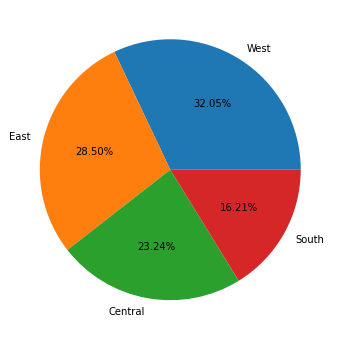

In [9]:
plt.figure(figsize=(12,6))
plt.pie(v,labels=s,autopct="%.2f%%")
plt.show()

## conclution
    the west region is having highestsales of 32.05%
    the south region has least sales of 16.21%

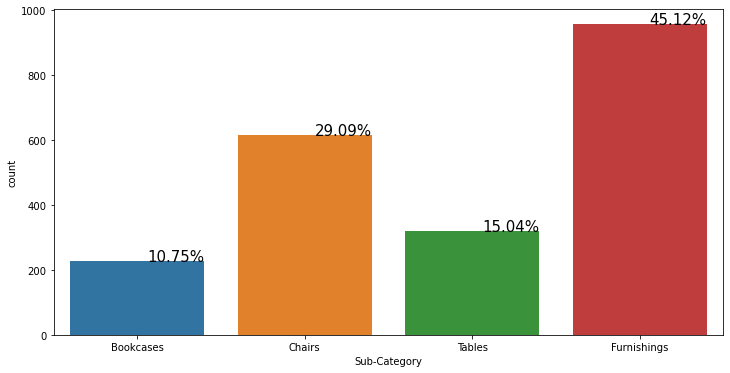

In [10]:
plt.figure(figsize=(12,6))
total=len(df1)
ax=sb.countplot(data=df1,x='Sub-Category')
for p in ax.patches:
    percentage='{:.2f}%'.format(100*p.get_height()/total)
    x=p.get_x()+p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y),ha='right',fontsize=15)
plt.show()

## conclution 
    1. the more no of sales are in furnishings subcategery of 45.12%
    2. the least sales are in boolcases with 10.75%

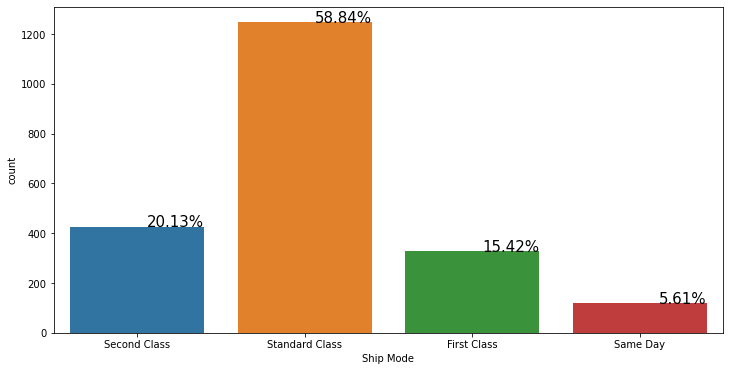

In [11]:
plt.figure(figsize=(12,6))
total=len(df1)
ax=sb.countplot(data=df1,x='Ship Mode')
for p in ax.patches:
    percentage='{:.2f}%'.format(100*p.get_height()/total)
    x=p.get_x()+p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y),ha='right',fontsize=15)
plt.show()

  ## CONCLUTION
               1. conclution the more no of order placed through standard ship mode with 58.84%
               2. and very least no of orders are placed in same day
               2. the better ship modes are second class and standard class

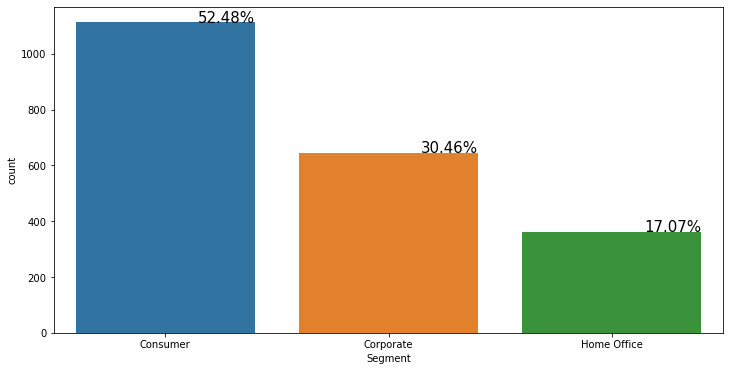

In [12]:
plt.figure(figsize=(12,6))
total=len(df1)
ax=sb.countplot(data=df1,x='Segment')
for p in ax.patches:
    percentage='{:.2f}%'.format(100*p.get_height()/total)
    x=p.get_x()+p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y),ha='right',fontsize=15)
plt.show()

## conclution 
                   the maximum no of sales are found in consumer segment  and corperate segment 
                   in home office segment sales are very less with 17.07 %  sales of total

                

## bivariate analysis

In [13]:
df1.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


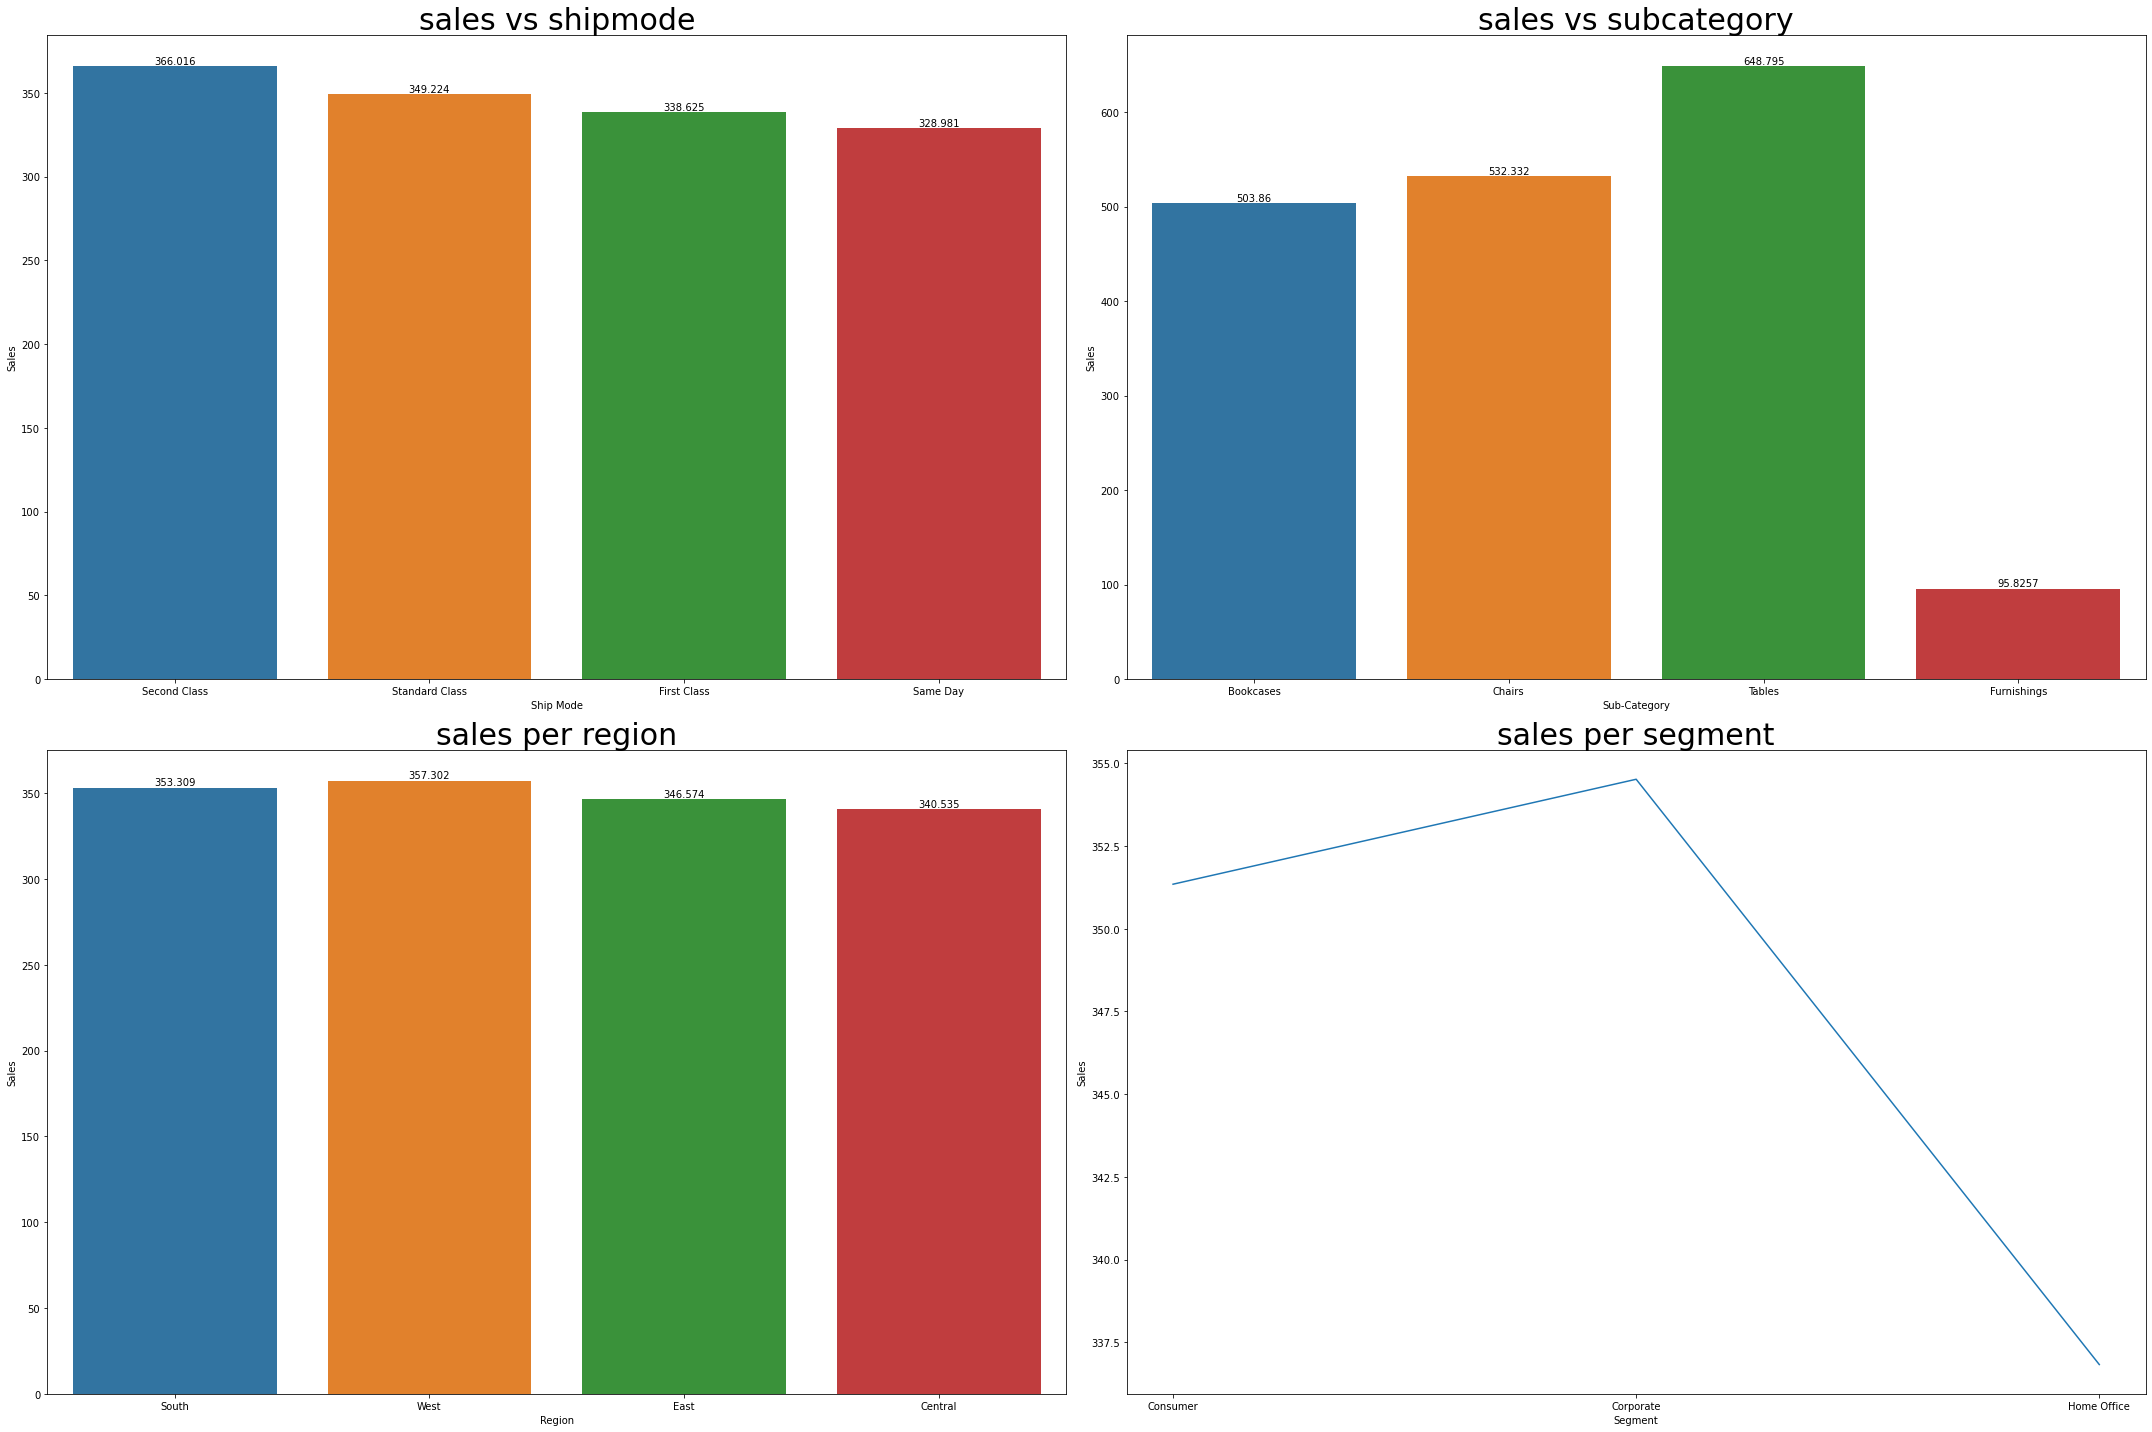

In [14]:
fig,ax=plt.subplots(2,2,figsize=(30,20))

plt.subplot(221)
ax=sb.barplot(data=df1,y='Sales',x='Ship Mode',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('sales vs shipmode',fontsize=30)

plt.subplot(222)
ax=sb.barplot(data=df1,y='Sales',x='Sub-Category',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('sales vs subcategory',fontsize=30)

plt.subplot(223)
ax=sb.barplot(data=df1,y='Sales',x='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('sales per region',fontsize=30)

plt.subplot(224)
sb.lineplot(data=df1,y='Sales',x='Segment',ci=None)
plt.title('sales per segment',fontsize=30)

plt.tight_layout()
plt.show()

  ## conclution
                      1. in second class the maximim sales are happening and     
                      2. minimum sales are insame day
                      3. in the tables categorythe more no of sales are thare compare to other sub category
                      4.in south regio the maximum sales are present 
                      5.in corporate segment the sales are increasing 
                       

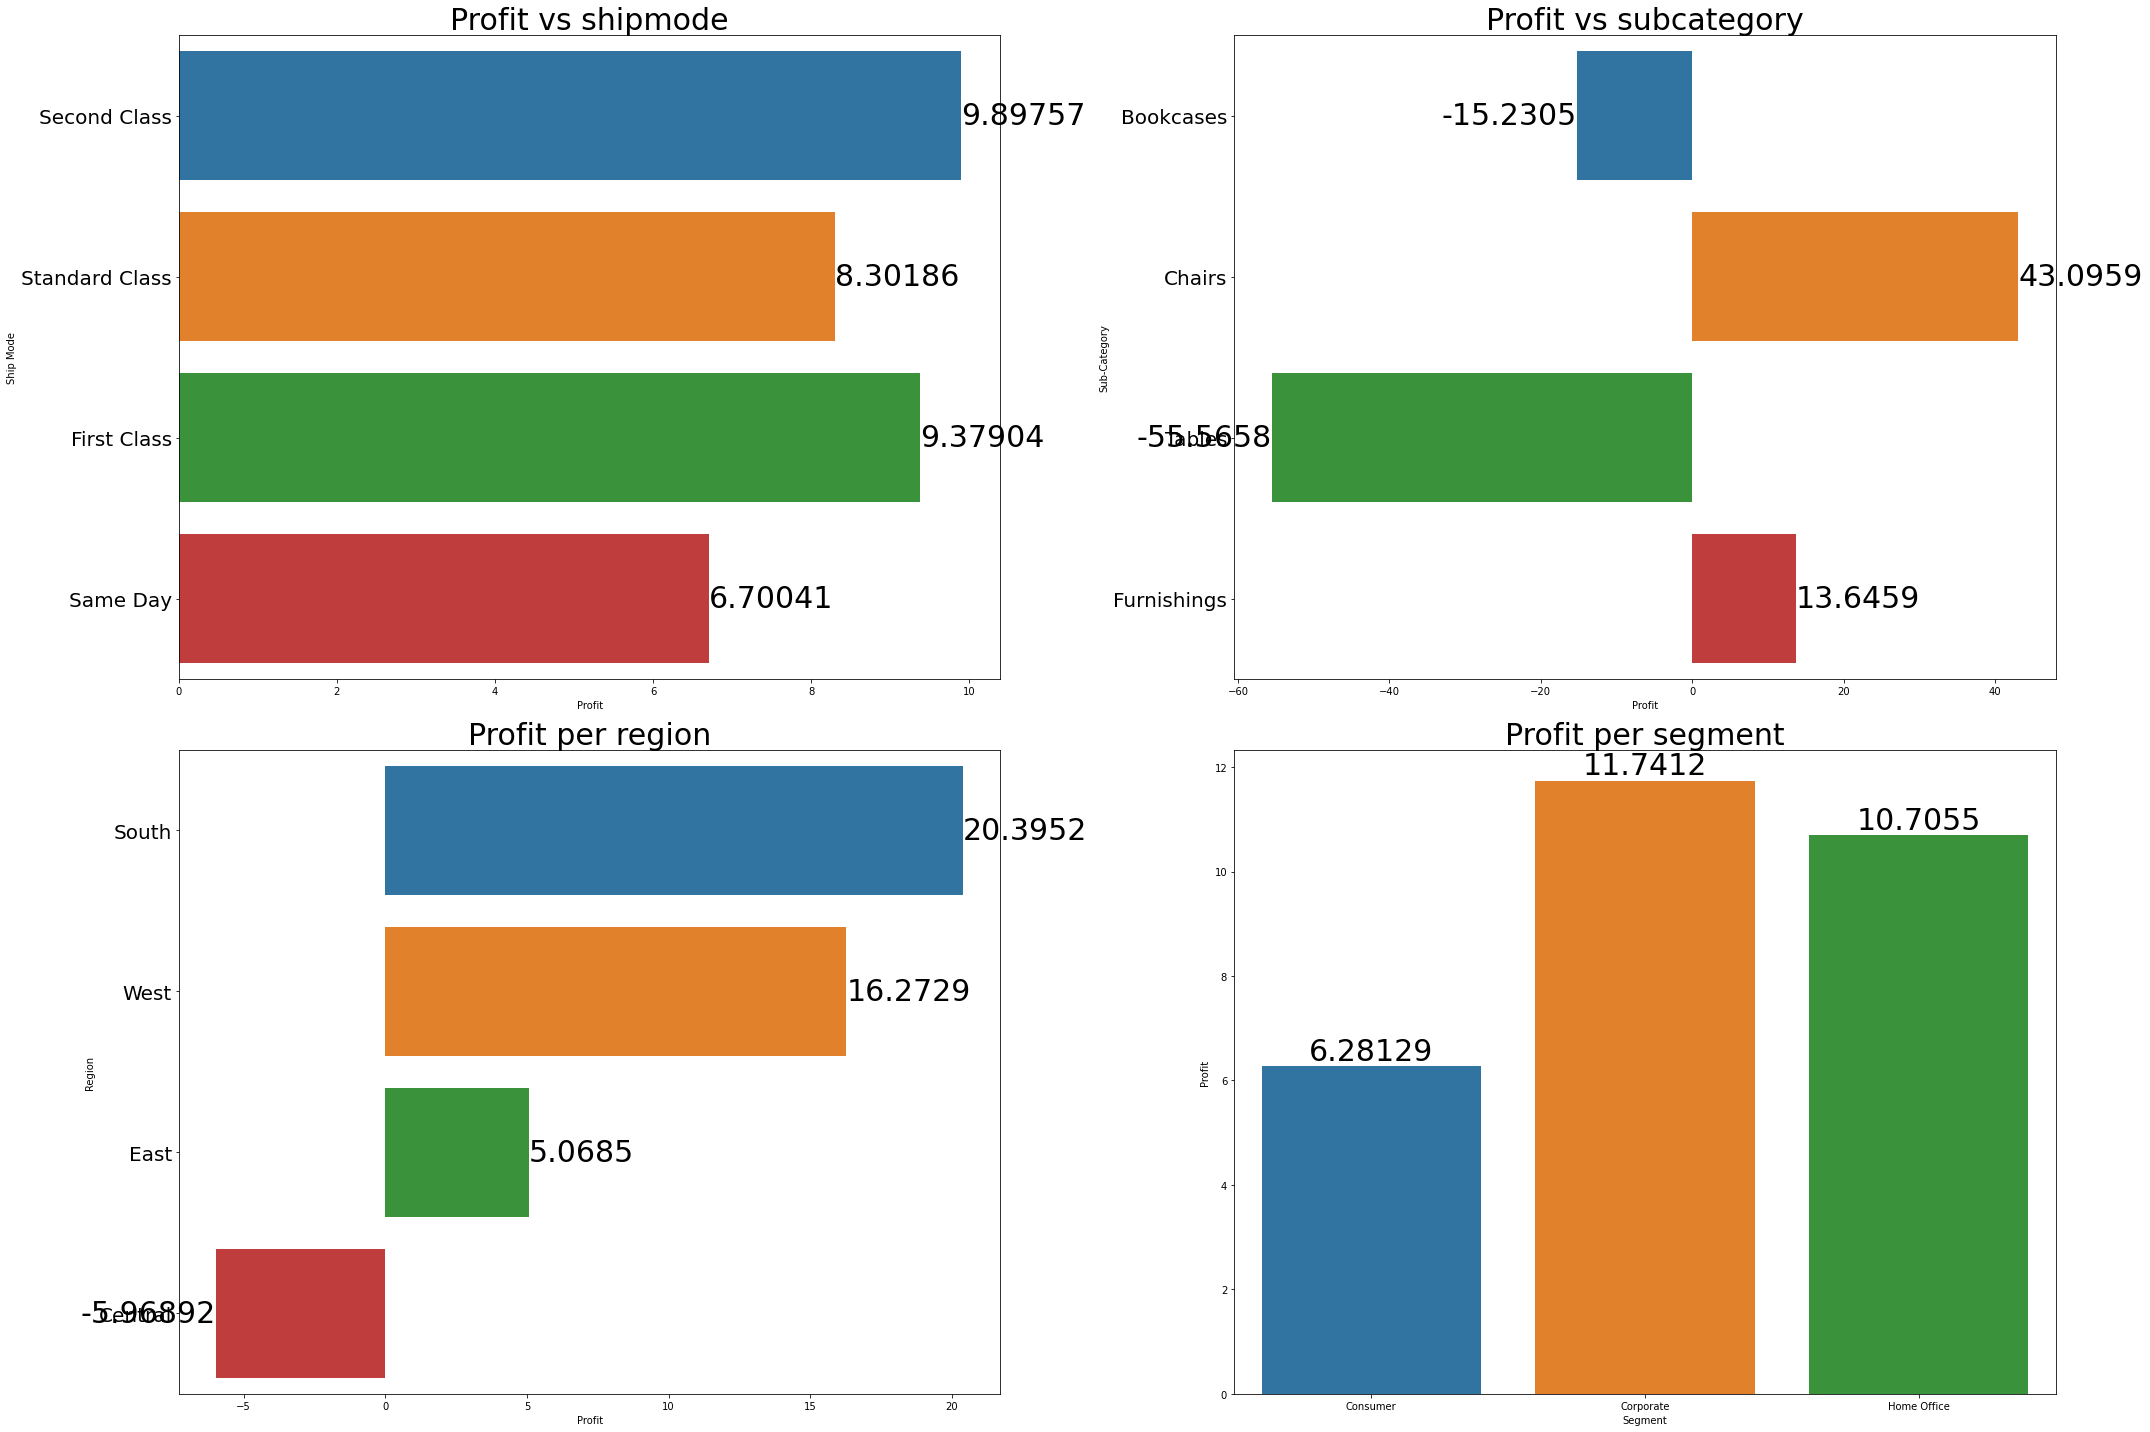

In [15]:
fig,ax=plt.subplots(2,2,figsize=(30,20))

plt.subplot(221)
ax=sb.barplot(data=df1,x='Profit',y='Ship Mode',ci=None)
for container in ax.containers:
    ax.bar_label(container,fontsize=30)
plt.title('Profit vs shipmode',fontsize=30)
plt.yticks(fontsize=20)

plt.subplot(222)
ax=sb.barplot(data=df1,x='Profit',y='Sub-Category',ci=None)
for container in ax.containers:
    ax.bar_label(container,fontsize=30)
plt.title('Profit vs subcategory',fontsize=30)
plt.yticks(fontsize=20)

plt.subplot(223)
ax=sb.barplot(data=df1,x='Profit',y='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container,fontsize=30)
plt.title('Profit per region',fontsize=30)
plt.yticks(fontsize=20)

plt.subplot(224)
ax=sb.barplot(data=df1,y='Profit',x='Segment',ci=None)
for container in ax.containers:
    ax.bar_label(container,fontsize=30)
plt.title('Profit per segment',fontsize=30)

plt.tight_layout()
plt.show()

## conclution
                    1. in ship mode the second ckass has the maximim profit and followed by first class
                    2. the least profit in same day 
                    3. in tables subcategory there is a loss of profit with 55.56 and in bookcase with 15.23
                    4. the profit in chairs and furnishings
                    5. in the region the maximum profit in south region and loss of profit in central region
                    6. in the segment there is no loss but maximum profit is in corporate office 

## multivariable analysis

In [16]:
df1.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


<Figure size 864x432 with 0 Axes>

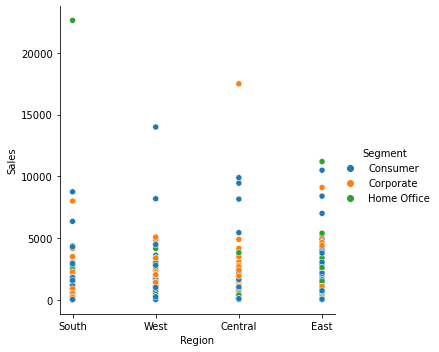

In [17]:
plt.figure(figsize=(12,6))
sb.relplot(data=df,x='Region',y='Sales',hue='Segment',ci=None)
plt.show()

##                                     conclution
                              inall region consumer has the highest sale 
                              in central region corporate has the highest sale 
                              in all region hiome office has the less salea

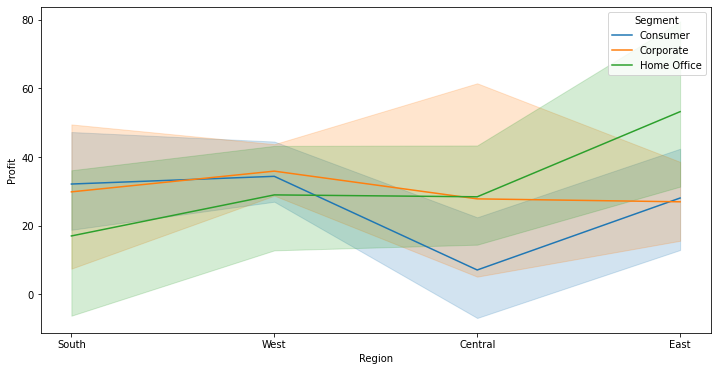

In [18]:
 plt.figure(figsize=(12,6))
sb.lineplot(data=df,x='Region',y='Profit',hue='Segment')
plt.show()

## intrepretation
        in east region home office are the best profit 
        

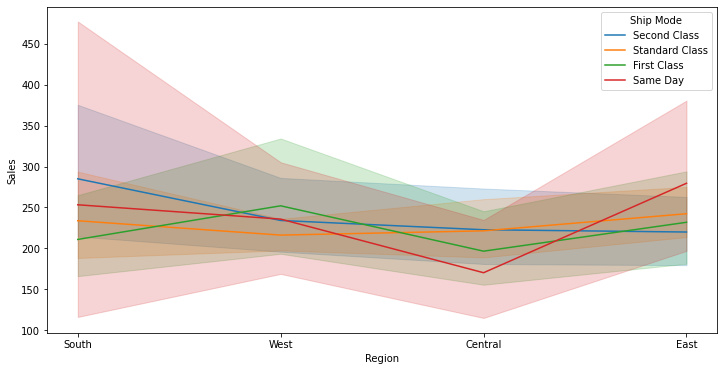

In [19]:
 plt.figure(figsize=(12,6))
sb.lineplot(data=df,x='Region',y='Sales',hue='Ship Mode')
plt.show()

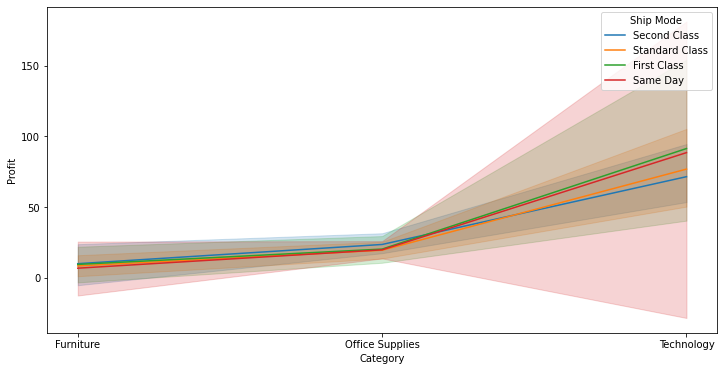

In [20]:
 plt.figure(figsize=(12,6))
sb.lineplot(data=df,x='Category',y='Profit',hue='Ship Mode')
plt.show()

## intrepretation
            1. in technology all the ship mode is giving the profit 
            2. in furniture we are getting less profite 
            3. in technology the first class giving more profit

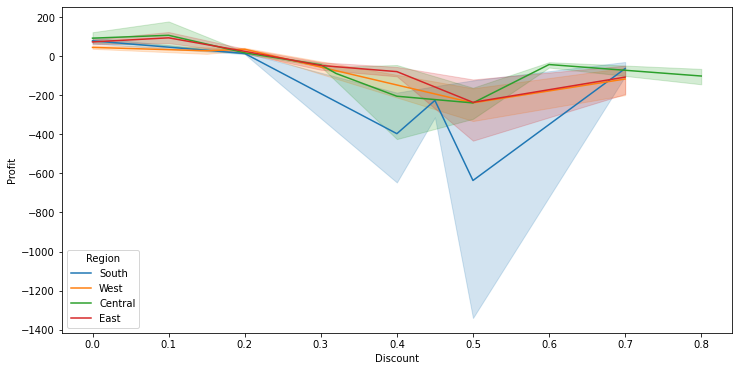

In [21]:
plt.figure(figsize=(12,6))
sb.lineplot(data=df,x='Discount',y='Profit',hue='Region')
plt.show()

# conclution
        1.in all region if the discount increase the profit decrease or increase in profit loss
        2.in southregionthere is maximum loss of profite
        

## data preprocessing

In [22]:
df1.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

## check for any special character 

In [23]:
for i in df:
    print(df[i].value_counts())

1       1
6666    1
6659    1
6660    1
6661    1
       ..
3333    1
3334    1
3335    1
3336    1
9994    1
Name: Row ID, Length: 9994, dtype: int64
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: Order ID, Length: 5009, dtype: int64
2016-09-05    38
2017-09-02    36
2016-11-10    35
2017-12-01    34
2017-12-02    34
              ..
2016-02-25     1
2016-10-25     1
2014-02-21     1
2016-10-18     1
2014-01-21     1
Name: Order Date, Length: 1237, dtype: int64
2015-12-16    35
2017-09-26    34
2017-12-06    32
2017-11-21    32
2017-09-06    30
              ..
2014-03-04     1
2017-02-11     1
2016-08-07     1
2017-04-08     1
2015-06-18     1
Name: Ship Date, Length: 1334, dtype: int64
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dty

## no special characterfoung in the data

In [24]:
df1=df.groupby('Order Date')['Sales'].sum().reset_index()

## set order date as index

In [25]:
df1=df1.set_index('Order Date')

In [26]:
df1=df1.resample('W').mean()

In [27]:
df1

,Sales
Order Date,
2014-01-05,108.014667
2014-01-12,919.914400
2014-01-19,751.521167
2014-01-26,960.597000
2014-02-02,273.718333
...,...
2017-12-03,4622.081429
2017-12-10,3429.565429
2017-12-17,1749.327167


## calculate seasonal components

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
decopm=seasonal_decompose(df1,period=52)

In [30]:
d_trend=decopm.trend
seasonal=decopm.seasonal
resid=decopm.resid

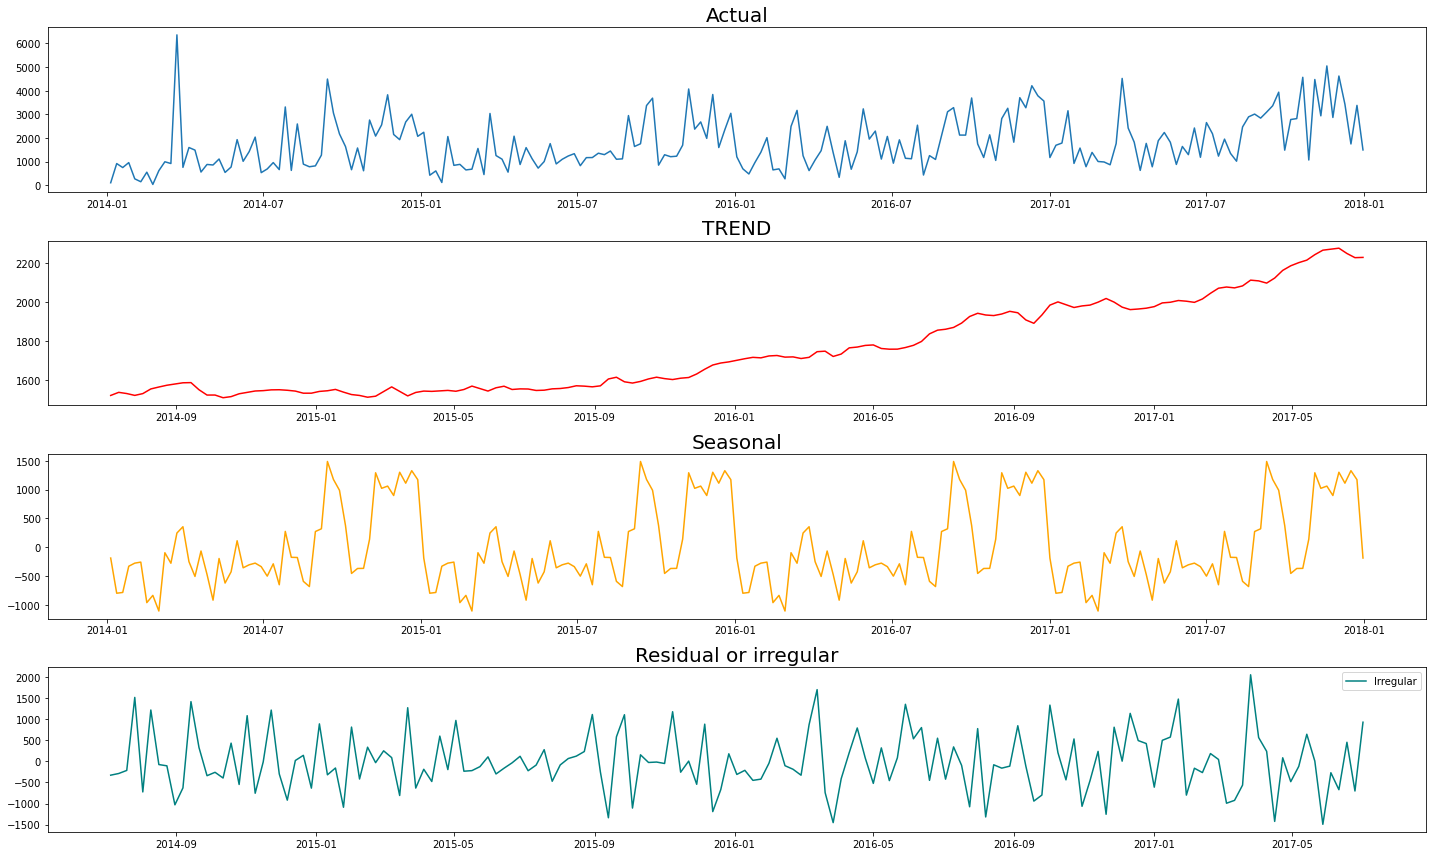

In [31]:
plt.figure(figsize=(20,12))
plt.subplot(4,1,1)
plt.plot(df1,label='original')
plt.title('Actual',fontsize=20)
plt.subplot(4,1,2)
plt.plot(d_trend,label='Trend',color='r')
plt.title('TREND',fontsize=20)
plt.subplot(4,1,3)
plt.plot(seasonal,label='Seasonality',color='orange')
plt.title('Seasonal',fontsize=20)
plt.subplot(4,1,4)
plt.plot(resid,label='Irregular',color='teal')
plt.title('Residual or irregular',fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()


## conclition 
            in the main data we can see both trend and   seasnolity        
            2.in the second graph we can see the upword trend in the data
            3.in the starting the sales are zero and in  in the end the increase in tha sales 
            4.we can observe the peak at a speciefied period of a year we can observe the seasonalityin the graph 
            5.in the graph it is of noice data hense is is showing irregularity in the trens

## smoothing techniques 

## MA (moving average)

In [32]:
ma=df1.rolling(window=5).mean()


In [33]:
ma=pd.DataFrame({'actual':df1.Sales,'ma':ma.Sales})

In [34]:
ma

,actual,ma
Order Date,,
2014-01-05,108.014667,NaN
2014-01-12,919.914400,NaN
2014-01-19,751.521167,NaN
2014-01-26,960.597000,NaN
2014-02-02,273.718333,602.753113
...,...,...
2017-12-03,4622.081429,3990.962429
2017-12-10,3429.565429,3781.859200
2017-12-17,1749.327167,3543.956862


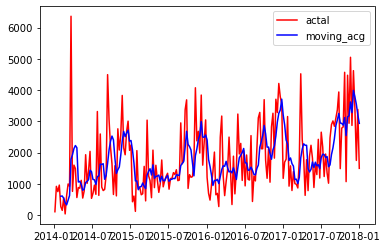

In [35]:
plt.plot(df1['Sales'],color='r',label='actal')
plt.plot(ma['ma'],color='b',label='moving_acg')
plt.legend(loc='best')
plt.show()

In [36]:
df1

,Sales
Order Date,
2014-01-05,108.014667
2014-01-12,919.914400
2014-01-19,751.521167
2014-01-26,960.597000
2014-02-02,273.718333
...,...
2017-12-03,4622.081429
2017-12-10,3429.565429
2017-12-17,1749.327167


## splitting the data 

In [37]:
no=int(0.8*len(df1))
train=df1.iloc[:no]
train
test=df1.iloc[no:]
test.shape,train.shape

((42, 1), (167, 1))

## simple exponential smoothing

In [38]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [39]:
alpha=[0,0.2,0.4,0.6,0.8]

In [40]:
def simple(data,alpha):
    model=SimpleExpSmoothing(data).fit(smoothing_level=alpha)
    pred=model.fittedvalues
    df2=pd.DataFrame({'actual':data,'forecast':pred})
    return (model,df2)

In [41]:
simple1={}
model=[]

In [42]:
for a in alpha:
    m,d=simple(df1['Sales'],a)
    simple1[a]=d.forecast
    model.append(m)    

In [43]:
model

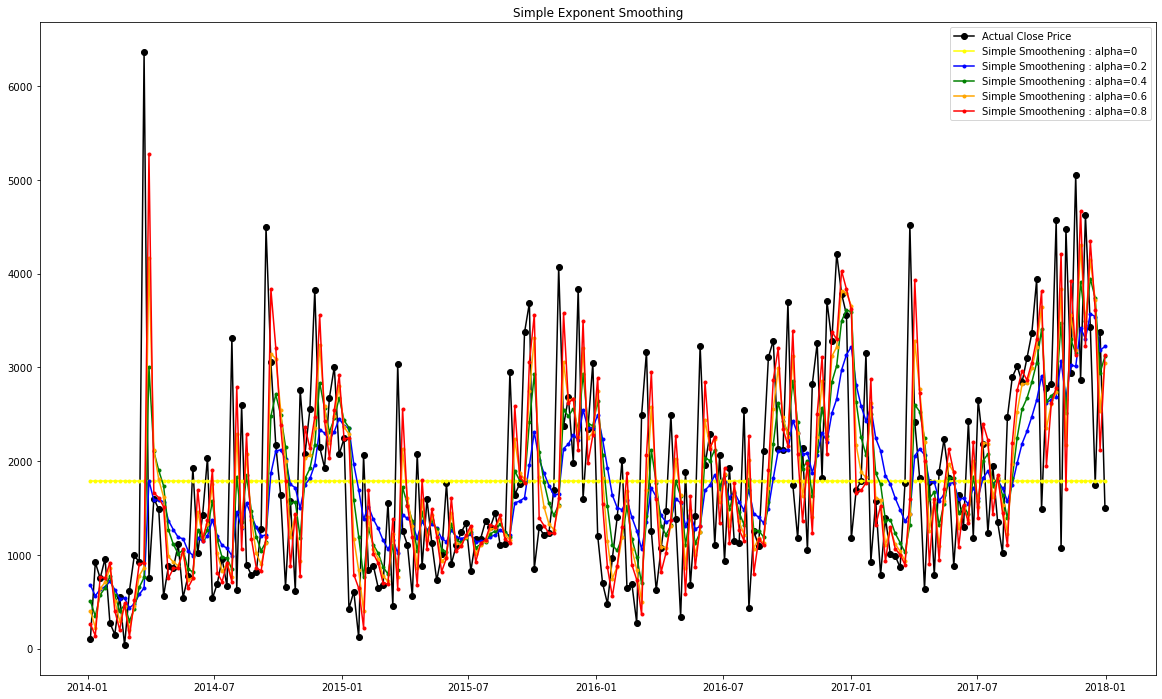

In [44]:
colors = ['yellow','blue','green','orange','red']


# plot the actual and forecast data
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(df1['Sales'], marker='o', color='black',label='Actual Close Price')

for i in range(len(alpha)):
    plt.plot(simple1[alpha[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alpha[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

## conclution
         wgen we use alpha= .8 tha ata of following the main data 
         and when we use alha = .6 we cnr observe tha smoothened data because it covered with smoothebed data
         whwn we use alpha is 0.4 tha data is smoothened perfectly

## double smoothing 

In [45]:
from statsmodels.tsa.api import ExponentialSmoothing

In [46]:
model=ExponentialSmoothing(df1['Sales'],trend='additive').fit(smoothing_level=.4,smoothing_slope=.6)
forecast=model.fittedvalues

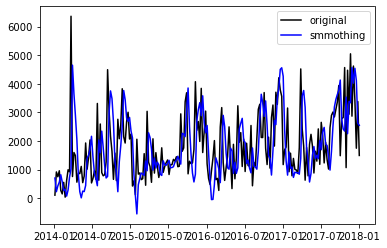

In [47]:
plt.plot(df1['Sales'],color='black',label='original')
plt.plot(forecast,color='b',label='smmothing')
plt.legend()
plt.show()

## conclution 
        we can observe that the the data is smoothened we can observe  trend in the data

In [129]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [139]:
## triple smrrthing
model=ExponentialSmoothing(df1['Sales'],trend='additive').fit(smoothing_level=.4,smoothing_trend=.6,smoothing_seasonal=.6)
forecast=model.fittedvalues


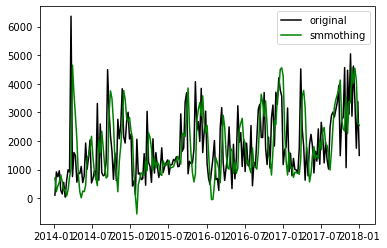

In [140]:
plt.plot(df1['Sales'],color='black',label='original')
plt.plot(forecast,color='green',label='smmothing')
plt.legend()
plt.show()

In [ ]:
model=ExponentialSmoothing(df1['Sales']).fit()
forecast=model.forecast()

## to check thr data stationary

In [50]:
from statsmodels.tsa.stattools import adfuller

In [51]:
def checkstationry(data):
    pvalue=adfuller(data)[1]
    if pvalue<0.05:
        st='data is stationary '
    else:
        st='data is not stationary'
    return st

In [52]:
checkstationry(df1['Sales'])

'data is stationary '

## use acf and pacf to decide the order of model with season of weks 52

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

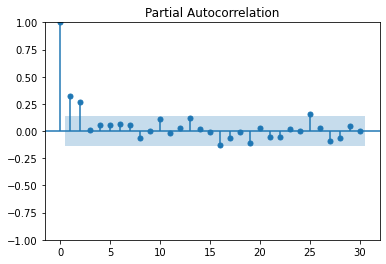

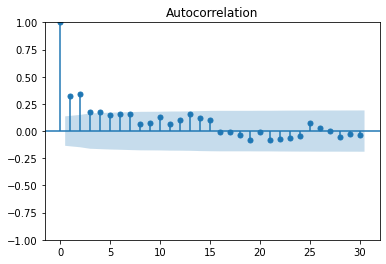

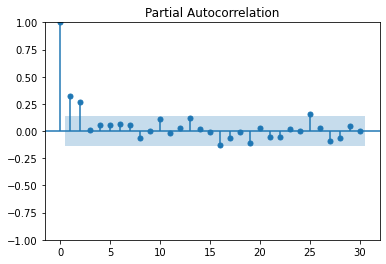

In [54]:
plot_acf(df1.Sales,lags=30)
plot_pacf(df1.Sales,lags=30)

p=4,q=4

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
def arima_model(data):
    
    list1 = []
    for p in range(4):
        
        for q in range(4):
            list1.append((p,0,q))
           
    model = []
    for i in list1:
        
        m=ARIMA(train.Sales,order=i).fit()
        model.append(m)
    
    aic=[]
    bic=[]
    forecast = []
    for v in model:
        
        f=v.predict(len(train),len(train)+len(test)-1)
        forecast.append(f)
        a=v.aic
        b=v.bic
        aic.append(a)
        bic.append(b)
       
    RMSE=[]
    for a in forecast[0:]:
        
        rmse = mean_squared_error(test.Sales,a,squared=False)
        RMSE.append(round(rmse,3))
    df1=pd.DataFrame()
    df1['list']=list1
    df1['rmse']=RMSE
    df1['aic']=aic
    df1['bic']=bic
   
       
    return(df1)

In [57]:
from statsmodels.tsa.arima.model import ARIMA

In [58]:
df2=arima_model(train.Sales)


C:\Users\Windows\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [59]:
df2

,list,rmse,aic,bic
0,"(0, 0, 0)",1390.844,2800.765356,2807.001343
1,"(0, 0, 1)",1391.322,2792.863996,2802.217978
2,"(0, 0, 2)",1398.018,2786.361981,2798.833956
3,"(0, 0, 3)",1403.249,2786.603217,2802.193186
4,"(1, 0, 0)",1395.110,2788.625806,2797.979787
5,"(1, 0, 1)",1405.936,2785.245541,2797.717517
6,"(1, 0, 2)",1403.489,2786.628631,2802.218601
7,"(1, 0, 3)",1406.777,2787.803470,2806.511433
8,"(2, 0, 0)",1404.365,2784.536979,2797.008954
9,"(2, 0, 1)",1404.901,2786.507466,2802.097435


In [60]:
df2[df2.aic==df2.aic.min()]

,list,rmse,aic,bic
15,"(3, 0, 3)",1396.581,2782.264538,2807.208489


In [61]:
from statsmodels.tsa.arima.model import ARIMA

In [62]:
model=ARIMA(train['Sales'],order=(3,0,3)).fit()

C:\Users\Windows\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  167
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1383.132
Date:                Mon, 14 Nov 2022   AIC                           2782.265
Time:                        10:31:10   BIC                           2807.208
Sample:                    01-05-2014   HQIC                          2792.389
                         - 03-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1626.7617    173.728      9.364      0.000    1286.260    1967.263
ar.L1          0.6534      0.201      3.246      0.001       0.259       1.048
ar.L2         -0.7590      0.083     -9.140      0.000      -0.922      -0.596
ar.L3          0.6115      0.137      4.459      0.000       0.343       0.880
ma.L1         -0.4382      0.220     -1.992      0.046      -0.869      -0.007
ma.L2          0.9518      0.361      2.636      0.008       0.244       1.660
ma.L3         -0.5254      0.269     -1.950      0.051      -1.053       0.003
sigma2      8.365e+05   2.93e+05      2.852      0.004    2.62e+05    1.41e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               132.85
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             1.29
Prob(H) (two-sided):                  0.16   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
import statsmodels.api as sm
pvalue = sm.stats.acorr_ljungbox(model.resid,lags=[1],return_df=True)['lb_pvalue'].values


In [65]:
if pvalue <0.05:
    print('not good')
else:
    print('good')

good


In [66]:
pred_arma=model.predict(len(train),(len(train)+len(test)-1))

In [67]:
df1

,Sales
Order Date,
2014-01-05,108.014667
2014-01-12,919.914400
2014-01-19,751.521167
2014-01-26,960.597000
2014-02-02,273.718333
...,...
2017-12-03,4622.081429
2017-12-10,3429.565429
2017-12-17,1749.327167


In [68]:
df1['arma']=pred_arma

## visvalization of predicted vs actual

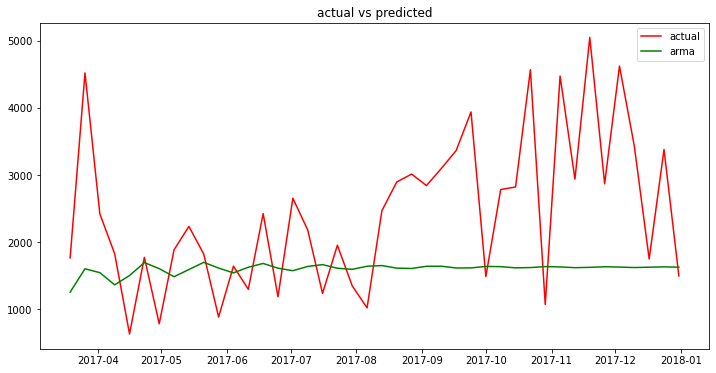

In [69]:
plt.figure(figsize=(12,6))
plt.plot(test['Sales'],color='red',label='actual')
plt.plot(df1['arma'],color='green',label='arma')
plt.title('actual vs predicted')
plt.legend(loc='best')
plt.show()

## model evalvation 

In [71]:
arma_mse=round(mean_squared_error(test.Sales,pred_arma),2)
arma_rmse=round(np.sqrt(arma_mse),2)
arma_rmse,arma_mse

(1396.58, 1950437.84)

In [72]:
arma_aic=model.aic
arma_bic=model.bic
arma_aic,arma_bic

(2782.2645382542996, 2807.2084887536334)

## arima model

In [73]:
model=ARIMA(train['Sales'],order=(3,1,3)).fit()

C:\Users\Windows\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  167
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1377.560
Date:                Mon, 14 Nov 2022   AIC                           2769.120
Time:                        10:32:22   BIC                           2790.904
Sample:                    01-05-2014   HQIC                          2777.962
                         - 03-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1357      0.076      1.795      0.073      -0.012       0.284
ar.L2         -0.7691      0.084     -9.169      0.000      -0.934      -0.605
ar.L3          0.2220      0.090      2.460      0.014       0.045       0.399
ma.L1         -0.8683      0.040    -21.583      0.000      -0.947      -0.789
ma.L2          0.9014      0.100      8.986      0.000       0.705       1.098
ma.L3         -0.9584      0.097     -9.848      0.000      -1.149      -0.768
sigma2      8.761e+05   8.58e+04     10.212      0.000    7.08e+05    1.04e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               190.70
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             1.30
Prob(H) (two-sided):                  0.19   Kurtosis:                         7.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
import statsmodels.api as sm
pvalue = sm.stats.acorr_ljungbox(model.resid,lags=[1],return_df=True)['lb_pvalue'].values


In [76]:
if pvalue <0.05:
    print('not good')
else:
    print('good')

good


In [77]:
pred_arima=model.predict(len(train),len(train)+len(test)-1)

In [78]:
df1['arima']=pred_arima

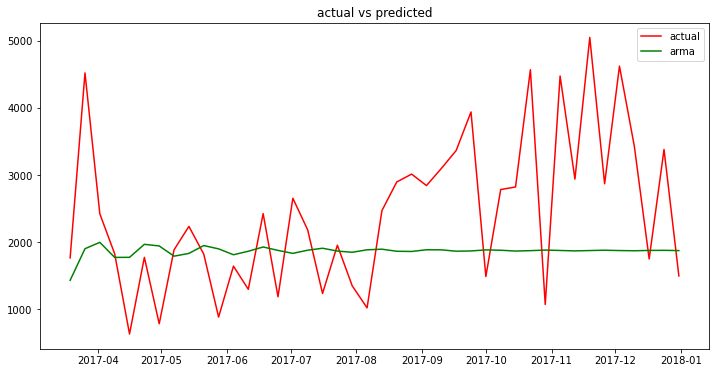

In [79]:
plt.figure(figsize=(12,6))
plt.plot(test['Sales'],color='red',label='actual')
plt.plot(df1['arima'],color='green',label='arma')
plt.title('actual vs predicted')
plt.legend(loc='best')
plt.show()

## model  evalvation

In [80]:
arima_mse=round(mean_squared_error(test.Sales,pred_arima),2)
arima_rmse=round(np.sqrt(arima_mse),2)
arima_rmse,arima_mse

(1264.63, 1599287.05)

In [81]:
arima_aic=model.aic
arima_bic=model.bic
arima_aic,arima_bic

(2769.1200745038086, 2790.9039890223044)

## sarima model

In [82]:
from pmdarima.arima import auto_arima

In [83]:
m1 = auto_arima(df1.Sales,start_p=0,max_p=4, start_q=0,max_q=4, seasonal=True, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3575.789, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3513.390, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3483.615, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3573.797, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3483.911, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3485.400, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3487.322, Time=0.81 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3482.423, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3483.111, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3483.555, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3511.422, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3486.072, Time=0.45 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.439 seconds
                               SARIMAX Results                                
Dep. Vari

In [84]:
p=0;q=1;d=1
P=0;Q=1;D=1

## model            

In [85]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

In [86]:
model = SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,52)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  167
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood                -946.456
Date:                            Mon, 14 Nov 2022   AIC                           1898.913
Time:                                    10:32:41   BIC                           1907.122
Sample:                                01-05-2014   HQIC                          1902.244
                                     - 03-12-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      7.904     -0.127      0.899     -16.491      14.491
ma.S.L52      -0.9867      7.973     -0.124      0.902     -16.614      14.641
sigma2      6.398e+05    1.1e-05    5.8e+10      0.000     6.4e+05     6.4e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.40   Prob(JB):                         0.76
Heteroskedasticity (H):               1.41   Skew:                            -0.03
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+28. Standard errors may be unstable.
"""

In [87]:
pred_sarima=model.predict(len(train),len(train)+len(test)-1)

In [88]:
pred_next=model.predict(len(train),len(train)+len(test)+52)

In [89]:
pred_next

2017-03-19    3643.804281
2017-03-26    1437.440393
2017-04-02    1689.428777
2017-04-09    1614.359858
2017-04-16    2049.554532
                 ...     
2018-12-09    3433.165573
2018-12-16    3560.232637
2018-12-23    3185.101554
2018-12-30    1954.307371
2019-01-06    1694.019975
Freq: W-SUN, Name: predicted_mean, Length: 95, dtype: float64

##   model evalvation

In [90]:
sarima_mse=round(mean_squared_error(test.Sales,pred_arima),2)
sarima_rmse=round(np.sqrt(sarima_mse),2)
sarima_rmse,sarima_mse

(1264.63, 1599287.05)

In [91]:
sarima_aic=model.aic
sarima_bic=model.bic
sarima_aic,sarima_bic

(1898.912947096769, 1907.1215424419524)

In [92]:
df1['sarima']=pred_sarima

## actual vs predicted

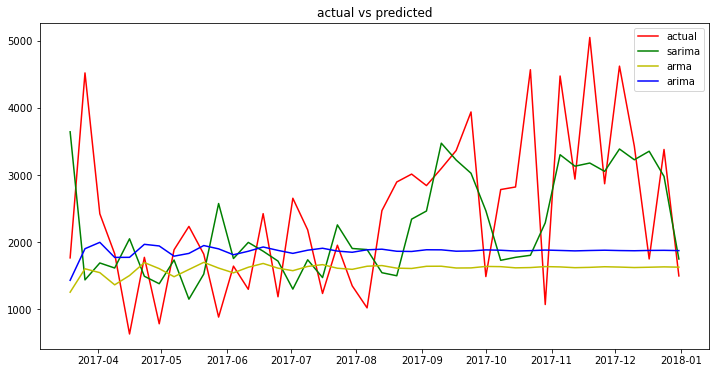

In [94]:
plt.figure(figsize=(12,6))
plt.plot(test['Sales'],color='red',label='actual')
plt.plot(pred_sarima,color='green',label='sarima')
plt.plot(pred_arma,color='y',label='arma')
plt.plot(pred_arima,color='b',label='arima')
plt.title('actual vs predicted')
plt.legend(loc='best')
plt.show()

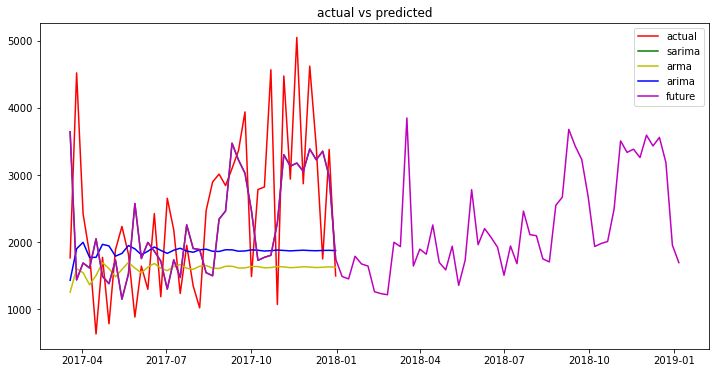

In [95]:
plt.figure(figsize=(12,6))
plt.plot(test['Sales'],color='red',label='actual')
plt.plot(pred_sarima,color='green',label='sarima')
plt.plot(pred_arma,color='y',label='arma')
plt.plot(pred_arima,color='b',label='arima')
plt.plot(pred_next,color='m',label='future')
plt.title('actual vs predicted')
plt.legend(loc='best')
plt.show()

In [96]:
from tabulate import tabulate

In [97]:
mse=list([arma_mse,arima_mse,sarima_mse])

In [98]:
arma_mse,arima_mse,sarima_mse

(1950437.84, 1599287.05, 1599287.05)

In [99]:
rmse=list([arma_rmse,arima_rmse,sarima_rmse])

In [100]:
aic=list([arma_aic,arima_aic,sarima_aic])
bic=list([arma_bic,arima_bic,sarima_bic])


In [101]:
model=['arma','arima','sarima']

In [102]:
result=tabulate({'model':model,'mse':mse,'rmse':rmse,'aic':aic,'bic':bic},headers=['model','MSE','RMSE','AIC','BIC'])

In [103]:
print(result)

model            MSE     RMSE      AIC      BIC
-------  -----------  -------  -------  -------
arma     1.95044e+06  1396.58  2782.26  2807.21
arima    1.59929e+06  1264.63  2769.12  2790.9
sarima   1.59929e+06  1264.63  1898.91  1907.12


## from the above results the sarima model is the best 

In [158]:
df1

,Sales,arma,arima,sarima
Order Date,,,,
2014-01-05,108.014667,NaN,NaN,NaN
2014-01-12,919.914400,NaN,NaN,NaN
2014-01-19,751.521167,NaN,NaN,NaN
2014-01-26,960.597000,NaN,NaN,NaN
2014-02-02,273.718333,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,4622.081429,1628.310928,1874.306868,3387.383116
2017-12-10,3429.565429,1621.365530,1871.506198,3227.114418
2017-12-17,1749.327167,1625.954754,1876.107831,3354.181482
